In [50]:
import numpy as np
from utils import create_dataset, plot_contour  # Assuming utils.py is in the same directory

In [51]:


class NeuralNetwork:
    def __init__(self, X, y):
        self.m, self.n = X.shape
        self.lambd = 1e-3
        self.learning_rate = 0.1

        # size of NN
        self.h1 = 25  # First hidden layer
        self.h2 = len(np.unique(y))  # Output layer (number of classes)

    def init_kaiming_weights(self, l0, l1):
        w = np.random.randn(l0, l1) * np.sqrt(2.0 / l0)
        b = np.zeros((1, l1))

        # Assertions to ensure the shapes are correct
        assert w.shape == (l0, l1), f"Shape mismatch: w should be ({l0}, {l1})"
        assert b.shape == (1, l1), f"Shape mismatch: b should be (1, {l1})"

        return w, b

    def forward_prop(self, X, parameters):
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']

        a0 = X
        Z1 = np.dot(a0, W1) + b1
        a1 = np.maximum(Z1, 0)  # ReLU activation

        Z2 = np.dot(a1, W2) + b2

        # Softmax output layer
        exp_scores = np.exp(Z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        cache = {'a0': X, 'a1': a1, 'probs': probs}

        return cache, probs

    def compute_cost(self, y, probs, parameters):
        W1 = parameters['W1']
        W2 = parameters['W2']

        # Cross-entropy loss
        data_loss = -np.sum(np.log(probs[np.arange(self.m), y])) / self.m
        reg_loss = (np.sum(np.square(W1)) + np.sum(np.square(W2))) * (self.lambd / 2)

        cost = data_loss + reg_loss
        return cost

    def back_prop(self, cache, parameters, y):
        W2 = parameters['W2']
        W1 = parameters['W1']

        a0 = cache['a0']
        a1 = cache['a1']
        probs = cache['probs']

        dZ2 = probs
        dZ2[np.arange(self.m), y] -= 1
        dZ2 /= self.m

        dW2 = np.dot(a1.T, dZ2) + self.lambd * W2
        db2 = np.sum(dZ2, axis=0, keepdims=True)

        dZ1 = np.dot(dZ2, W2.T)
        dZ1[a1 <= 0] = 0  # Derivative of ReLU

        dW1 = np.dot(a0.T, dZ1) + self.lambd * W1
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        grads = {'dW2': dW2, 'db2': db2, 'dW1': dW1, 'db1': db1}

        return grads

    def update_parameters(self, parameters, gradients):
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']

        dW1 = gradients['dW1']
        db1 = gradients['db1']
        dW2 = gradients['dW2']
        db2 = gradients['db2']

        W1 -= self.learning_rate * dW1
        b1 -= self.learning_rate * db1
        W2 -= self.learning_rate * dW2
        b2 -= self.learning_rate * db2

        parameters = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        return parameters

    def main(self, X, y, num_iter=10000, print_cost=True):
        W1, b1 = self.init_kaiming_weights(self.n, self.h1)
        W2, b2 = self.init_kaiming_weights(self.h1, self.h2)

        parameters = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        for it in range(num_iter + 1):
            cache, probs = self.forward_prop(X, parameters)
            cost = self.compute_cost(y, probs, parameters)
            gradients = self.back_prop(cache, parameters, y)
            parameters = self.update_parameters(parameters, gradients)

            if print_cost and it % 1000 == 0:
                print(f"Iteration {it}: Cost {cost}")

        return parameters

    def predict(self, X, parameters):
        _, probs = self.forward_prop(X, parameters)
        predictions = np.argmax(probs, axis=1)
        return predictions




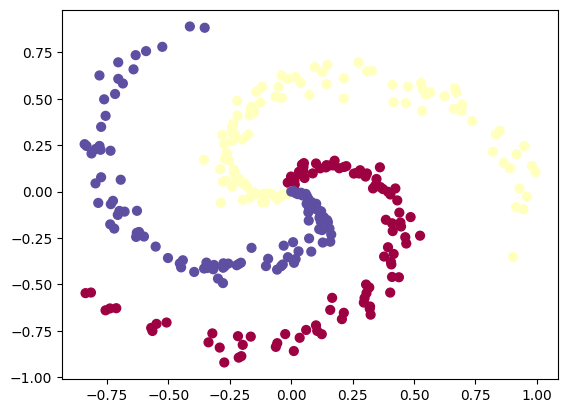

Iteration 0: Cost 0.999837644840507
Iteration 1000: Cost 0.37411246524756314
Iteration 2000: Cost 0.2872264578603473
Iteration 3000: Cost 0.2645035889087123
Iteration 4000: Cost 0.2553376590680594
Iteration 5000: Cost 0.2506806209850663
Iteration 6000: Cost 0.24830052649562398
Iteration 7000: Cost 0.2470646967540549
Iteration 8000: Cost 0.24624800846035458
Iteration 9000: Cost 0.24549116531828194
Iteration 10000: Cost 0.2450185115890925


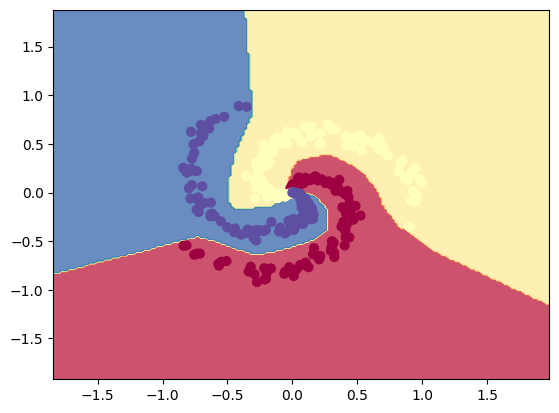

In [52]:
if __name__ == '__main__':
  X,y = create_dataset(N = 300,K =  3)
  y = y.astype(int)
  nn = NeuralNetwork(X,y)
  trained_parameters = nn.main(X,y)

  plot_contour(X,y,nn,trained_parameters)


  #300 points 3 classes

In [53]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler



iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)


nn = NeuralNetwork(X_train, y_train)
parameters = nn.main(X_train, y_train, num_iter=10000, print_cost=True)


y_pred = nn.predict(X_test, parameters)

accuracy = np.mean(y_pred == y_test)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Iteration 0: Cost 1.239446524740212
Iteration 1000: Cost 0.0858272095115408
Iteration 2000: Cost 0.07328031671018531
Iteration 3000: Cost 0.06766056700700063
Iteration 4000: Cost 0.06421064591374025
Iteration 5000: Cost 0.06173486081321694
Iteration 6000: Cost 0.05982392751986114
Iteration 7000: Cost 0.05829003921194205
Iteration 8000: Cost 0.05708303625951129
Iteration 9000: Cost 0.05611205851089321
Iteration 10000: Cost 0.05531420322096653
Model accuracy: 98.33%
